# **Q11**
Implement the K-means clustering-based unsupervised learning algorithm for the
dataset (“dataq11.xlsx”). Plot the estimated class labels vs individual features. Use the
number of clusters as K=20.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data_q11.xlsx to data_q11.xlsx


In [ ]:
data=pd.read_excel("/content/data_q11.xlsx",header=None)
data=pd.DataFrame(data)
Lt=np.random.randint(20,size=569).reshape(569,1)
Lt_next=np.random.randint(20,size=569).reshape(569,1)
data=np.array(data)
data=data/np.amax(np.abs(data),axis=0)

In [ ]:
uj = [None]*20

for t in range(300):
  for j in range(20):
    level_j = data[np.where(Lt==j),:].reshape(-1,13)
    uj[j] = np.mean(level_j,axis=0) if len(level_j)!=0 else [0]*13
  for i in range(569):
    Lt[i] = Lt_next[i]
    distance = [None]*20
    for j in range(20):
      distance[j] = np.sum(np.square(np.subtract(data[i],uj[j])))
    Lt_next[i] = np.argmin(distance)
  if np.sum(Lt_next-Lt)==0:
    break

result=np.concatenate((np.linspace(0,569,num=569, endpoint=False).reshape(569,1),Lt_next,Lt),axis=1)
result=pd.DataFrame(result)
result.columns=['Index','L(t+1)','L(t)']
print(result)

     Index  L(t+1)  L(t)
0      0.0     3.0  16.0
1      1.0     8.0  14.0
2      2.0     5.0  10.0
3      3.0    18.0  17.0
4      4.0     8.0  14.0
..     ...     ...   ...
564  564.0    15.0   4.0
565  565.0     8.0  14.0
566  566.0     8.0  14.0
567  567.0     3.0   9.0
568  568.0     8.0  14.0

[569 rows x 3 columns]


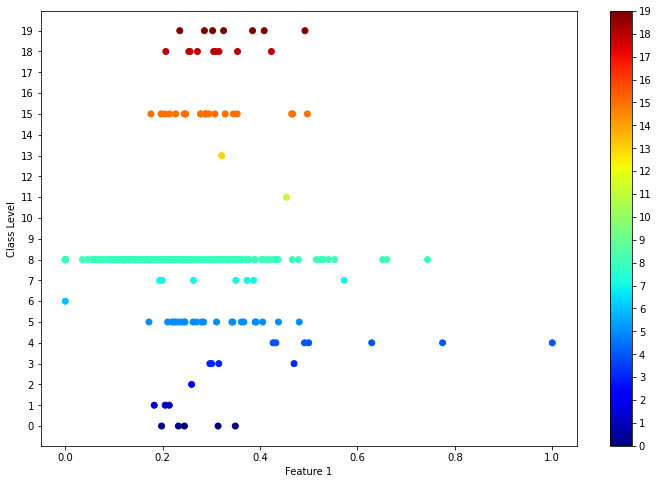

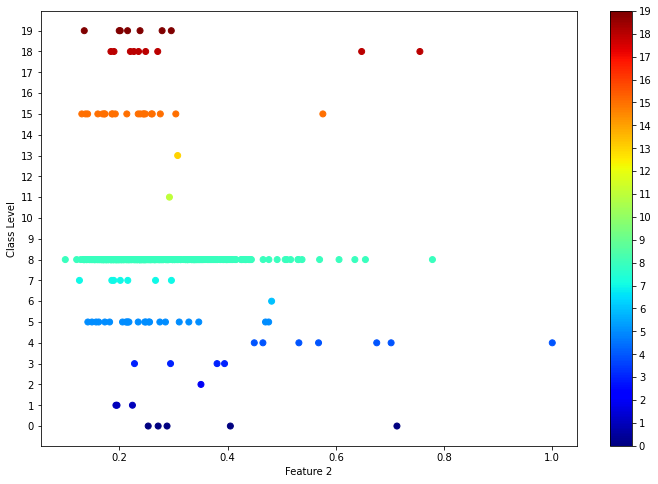

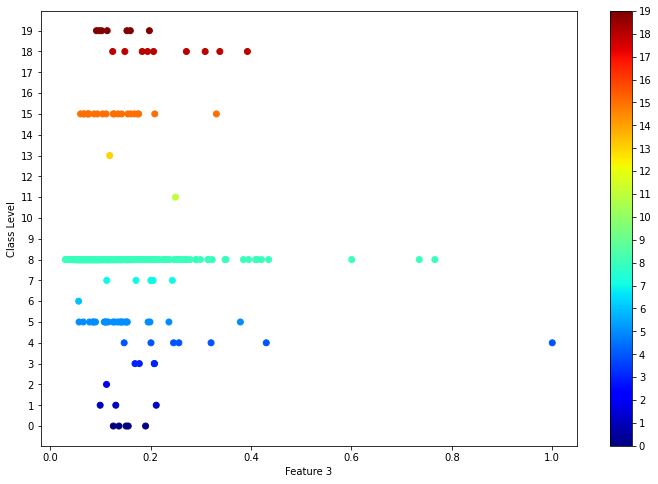

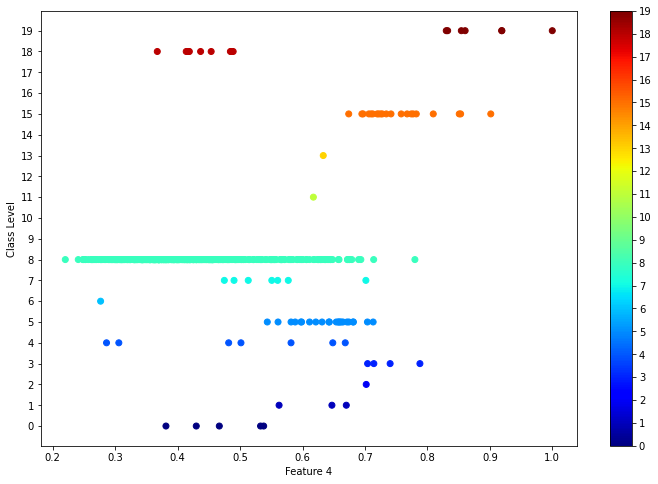

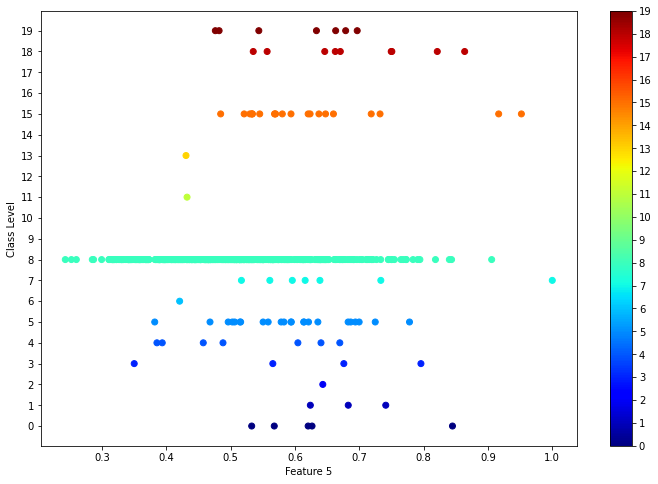

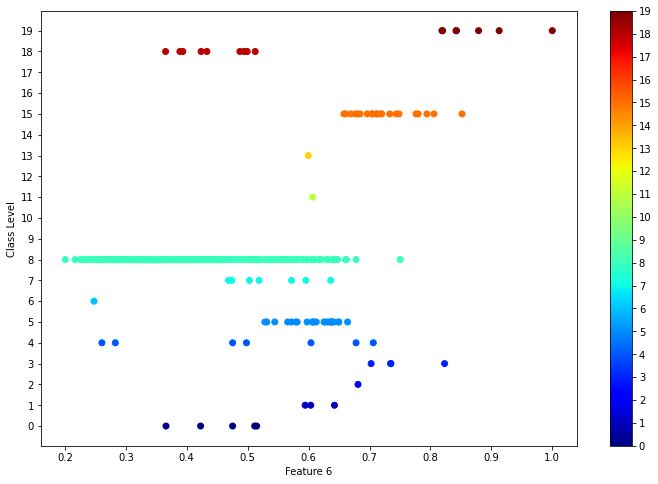

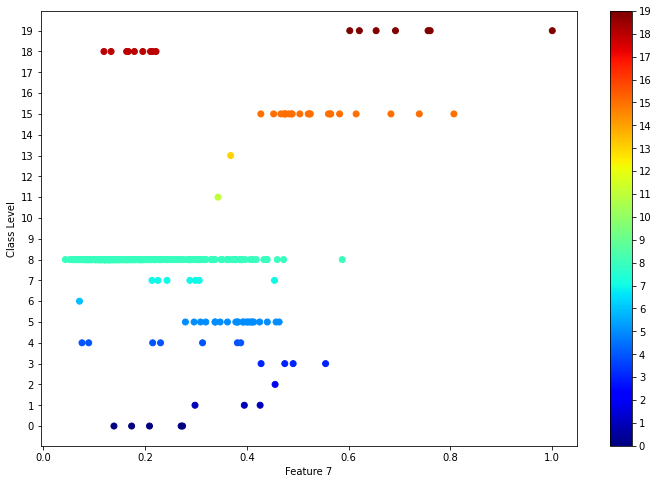

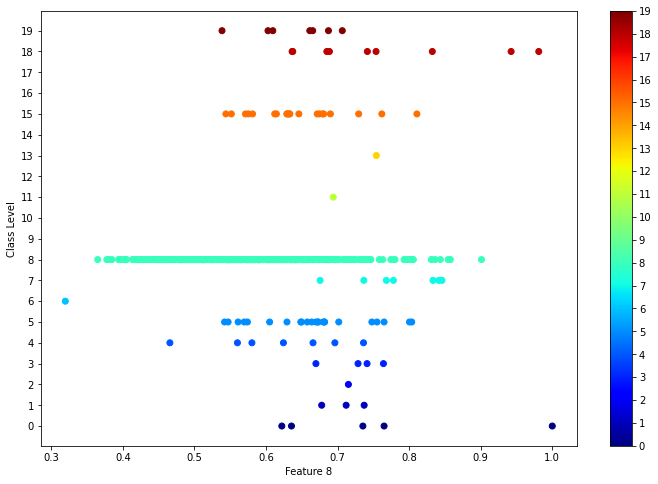

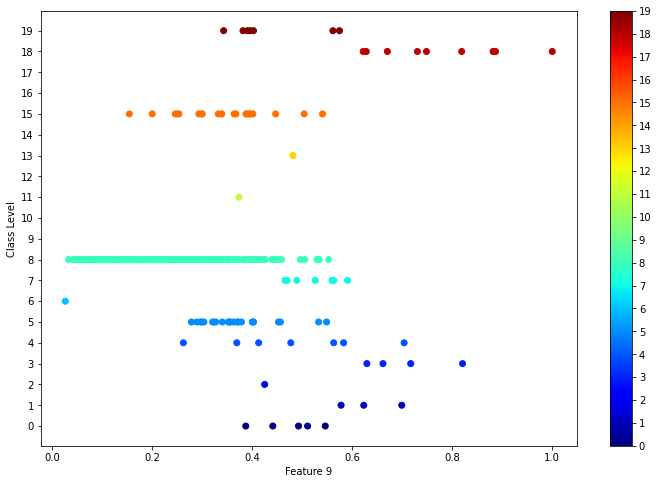

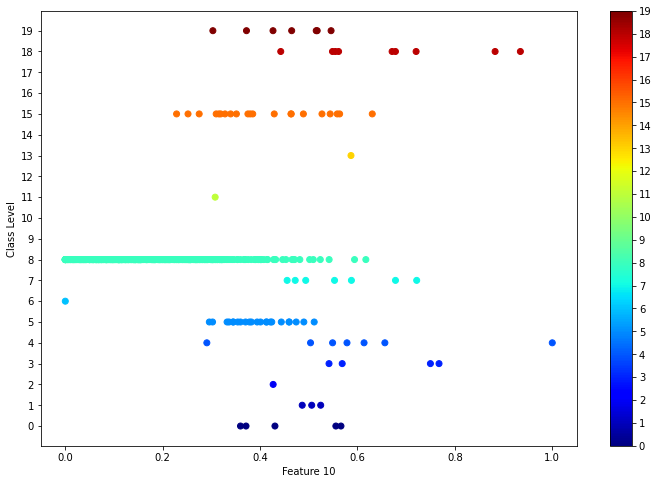

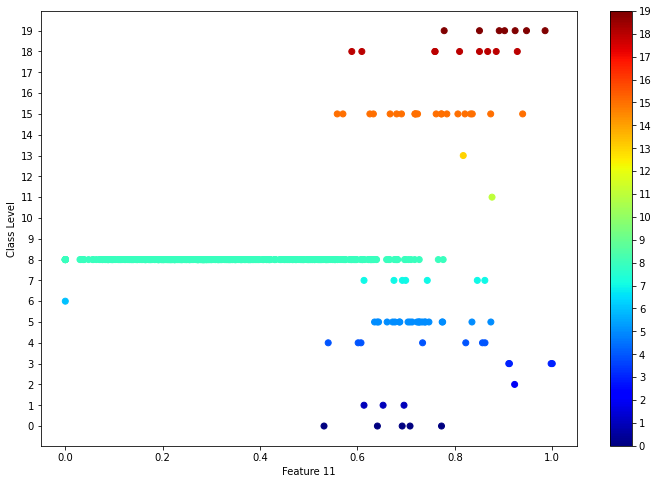

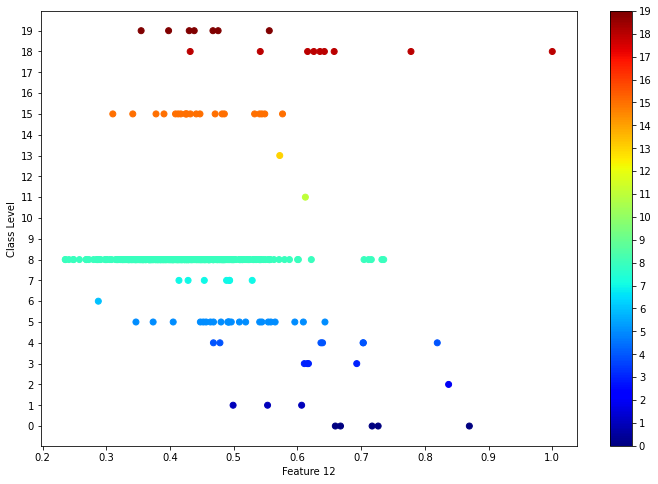

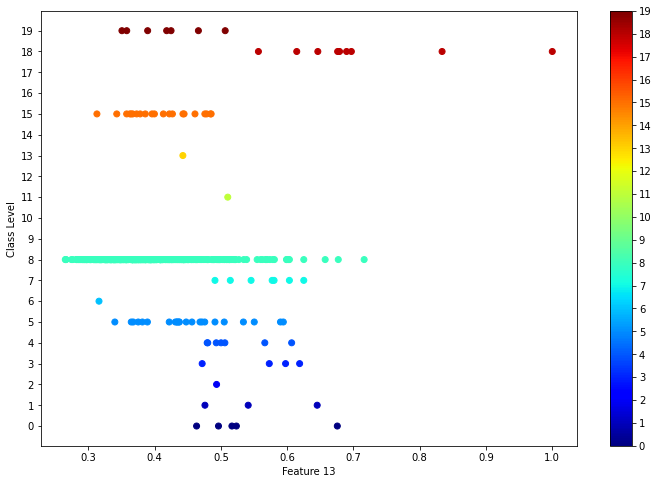

In [ ]:
k = Lt_next.flatten()
t = np.arange(20)
tic = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for f in range(13):
  features = data[:,f].flatten()
  plt.figure(figsize=(12,8))
  plt.scatter(features,k, c=k, cmap='jet', alpha=1)
  plt.yticks(tic)
  plt.xlabel("Feature {}".format(f+1))
  plt.ylabel("Class Level")
  plt.colorbar(ticks=tic)